### Looking at combined station CTD cast data

 - for regression analysis of O2 and beam transmission
 - processed from 1 m binned Seabird cnv files in 2018_St32_P2_individual notebook, which created csvs
 - that processing also created a combined station file with all cast data from that station occupation
 
 - in 2018_St32_P2_density, we saw that the deep chl max stays in the 25.7-26.2 range. So we'll sum first the chl in that range to look at chl over time during the station occupation (April 15-20).

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import kde
from matplotlib import cm
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [2]:
cd ~/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804/

/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804


In [3]:
# read into dataframe with Pressure (depth) as the index
p2_combine = pd.read_csv('Station32_combined_casts.csv', index_col=0)

# read into dataframe with Time (UTC) as the index
#p2_combine = pd.read_csv('Station32_combined_casts.csv', index_col=33)

# Convert the datetime to seconds elapsed
p2_combine['TimeSec'] = p2_combine.loc[:, 'Time']
p2_combine['TimeSec'] = p2_combine['TimeSec'].astype('datetime64').astype(int).astype(float)

# Define the Time column as mappable for colorbar creation
sm = plt.cm.ScalarMappable(cmap='viridis', 
                           norm=plt.Normalize(vmin=p2_combine.TimeSec.min(),
                                              vmax=p2_combine.TimeSec.max()))

sm._A = []

p2_combine.head()

,StartTime,timeS,scan,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,...,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS,flag,Time,TimeSec
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
10.060,2018-04-15 05:12:33,28.406,683.0,-107.00062,16.90048,10.0,26.6322,26.6326,5.402263,5.402444,...,34.4507,34.4517,22.4215,22.4222,6.5181,199.225,98.638,False,2018-04-15 05:13:01.406,1.523769e+18
11.066,2018-04-15 05:12:33,99.969,2400.0,-107.00062,16.90048,11.0,26.6327,26.6328,5.402342,5.402516,...,34.4507,34.4518,22.4214,22.4222,6.5252,199.444,98.747,False,2018-04-15 05:14:12.969,1.523769e+18
12.072,2018-04-15 05:12:33,104.055,2498.0,-107.00062,16.90048,12.0,26.6372,26.6373,5.403420,5.403521,...,34.4547,34.4554,22.4230,22.4236,6.5181,199.227,98.649,False,2018-04-15 05:14:17.055,1.523769e+18
13.078,2018-04-15 05:12:33,107.870,2590.0,-107.00062,16.90048,13.0,26.6368,26.6372,5.403477,5.403670,...,34.4551,34.4562,22.4236,22.4242,6.5210,199.314,98.691,False,2018-04-15 05:14:20.870,1.523769e+18
14.084,2018-04-15 05:12:33,109.071,2619.0,-107.00062,16.90048,14.0,26.6375,26.6378,5.403666,5.403869,...,34.4556,34.4569,22.4238,22.4247,6.5238,199.400,98.736,False,2018-04-15 05:14:22.071,1.523769e+18


## The deep chlorophyll max

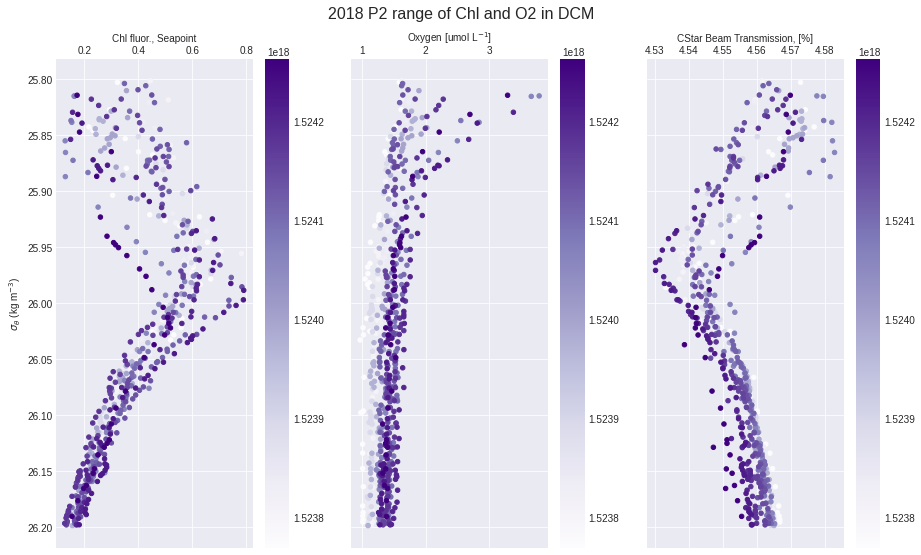

In [12]:
# slice the dataframe to be just the deep chlorophyll maximum
p2_dcm = p2_combine[p2_combine['sigma-�00'].between(25.8,26.2)]

# export to csv
p2_dcm.to_csv("P2_2018_DCM.csv")

# plot the range of chlorophyll, O2, beam transmission values in the DCM (wide slice)

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,9))

fig2.suptitle('2018 P2 range of Chl and O2 in DCM', fontsize=16, y = 0.96)

# Chl

p2_dcm.plot(ax = ax1, kind='scatter', x='flSP', y= 'sigma-�00', c = p2_dcm.TimeSec, cmap = cm.Purples)
#ax1.plot(temp,depth,'o-')
ax1.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Chl fluor., Seapoint')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.grid(True)

# Oxygen

p2_dcm.plot(ax = ax2, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-�00', c = p2_dcm.TimeSec, cmap = cm.Purples)
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
#ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Oxygen [umol L$^{-1}$]')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Beam transmission

p2_dcm.plot(ax = ax3, kind='scatter', x='CStarTr0', y= 'sigma-�00', c = p2_dcm.TimeSec, cmap = cm.Purples)
#ax3.plot(temp,depth,'o-')
ax3.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
#ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('CStar Beam Transmission, [%]')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.grid(True);

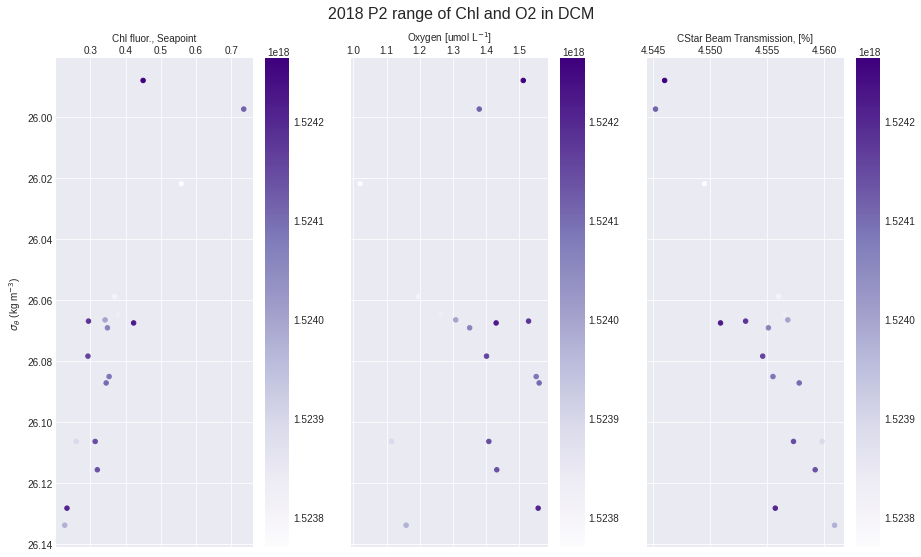

In [14]:
# slice the dataframe to be just the deep chlorophyll maximum by depth (120 m)
p2_dcm_120 = p2_combine[p2_combine['depSMignore']==120]

# export to csv
p2_dcm_120.to_csv("P2_2018_DCM.csv")

# plot the range of chlorophyll, O2, beam transmission values in the DCM (wide slice)

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,9))

fig2.suptitle('2018 P2 range of Chl and O2 in DCM', fontsize=16, y = 0.96)

# Chl

p2_dcm_120.plot(ax = ax1, kind='scatter', x='flSP', y= 'sigma-�00', c = p2_dcm_120.TimeSec, cmap = cm.Purples)
#ax1.plot(temp,depth,'o-')
ax1.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Chl fluor., Seapoint')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.grid(True)

# Oxygen

p2_dcm_120.plot(ax = ax2, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-�00', c = p2_dcm_120.TimeSec, cmap = cm.Purples)
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
#ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Oxygen [umol L$^{-1}$]')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Beam transmission

p2_dcm_120.plot(ax = ax3, kind='scatter', x='CStarTr0', y= 'sigma-�00', c = p2_dcm_120.TimeSec, cmap = cm.Purples)
#ax3.plot(temp,depth,'o-')
ax3.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
#ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('CStar Beam Transmission, [%]')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.grid(True);

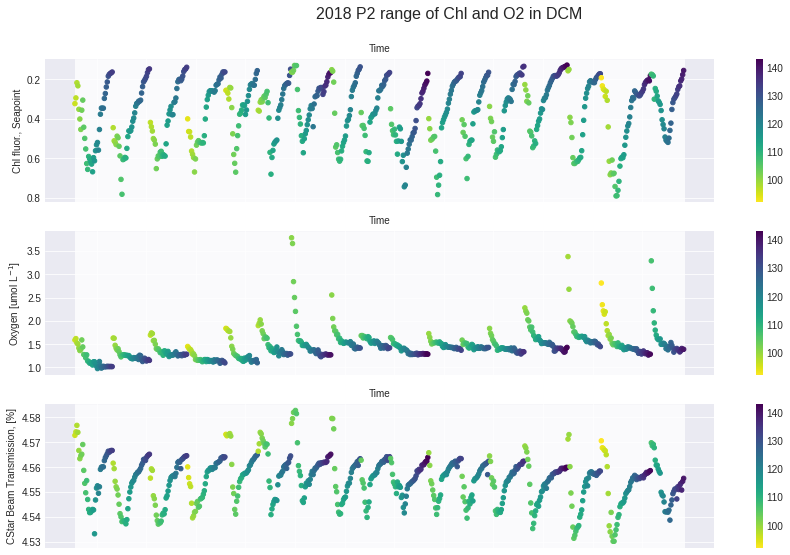

In [5]:
# plot the range of chlorophyll, O2, beam transmission values in the DCM over time

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,9))

fig2.suptitle('2018 P2 range of Chl and O2 in DCM', fontsize=16, y = 0.96)

orig_map=plt.cm.get_cmap('viridis')
reversed_map = orig_map.reversed()

# Chl

p2_dcm.plot(ax = ax1, kind='scatter', x='Time', y= 'flSP', c= p2_dcm.depSMignore, cmap = reversed_map)
#ax1.plot(temp,depth,'o-')
ax1.set_ylabel('Chl fluor., Seapoint')
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Time')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set(xticklabels=[])
ax1.grid(True)

# Oxygen

p2_dcm.plot(ax = ax2, kind='scatter', x='Time', y= 'sbox0Mm/Kg', c = p2_dcm.depSMignore, cmap = reversed_map)
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Oxygen [umol L$^{-1}$]')
#ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Time')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.set(xticklabels=[])
ax2.grid(True)

# Beam transmission

p2_dcm.plot(ax = ax3, kind='scatter', x='Time', y= 'CStarTr0', c = p2_dcm.depSMignore, cmap = reversed_map)
#ax3.plot(temp,depth,'o-')
ax3.set_ylabel('CStar Beam Transmission, [%]')
#ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('Time')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.set(xticklabels=[])
ax3.grid(True);

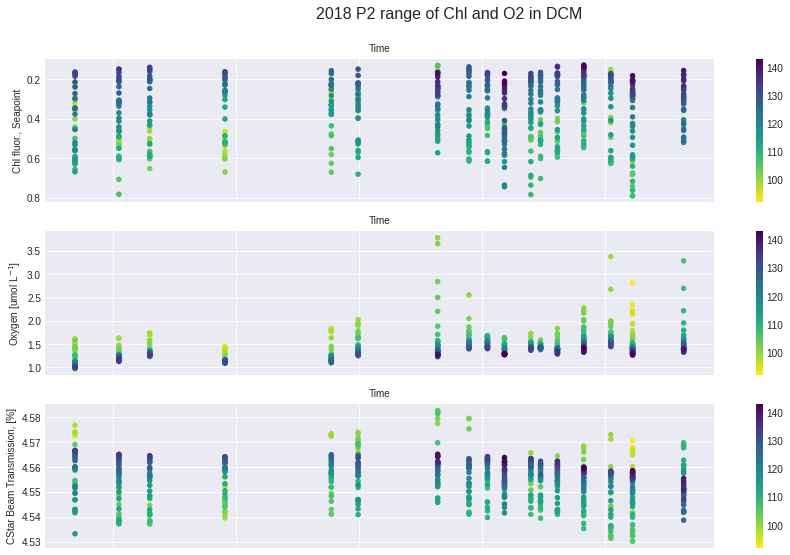

In [6]:
# plot the range of chlorophyll, O2, beam transmission values in the DCM over cast

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,9))

fig2.suptitle('2018 P2 range of Chl and O2 in DCM', fontsize=16, y = 0.96)

orig_map=plt.cm.get_cmap('viridis')
reversed_map = orig_map.reversed()

# Chl

p2_dcm.plot(ax = ax1, kind='scatter', x='TimeSec', y= 'flSP', c= p2_dcm.depSMignore, cmap = reversed_map)
#ax1.plot(temp,depth,'o-')
ax1.set_ylabel('Chl fluor., Seapoint')
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Time')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set(xticklabels=[])
ax1.grid(True)

# Oxygen

p2_dcm.plot(ax = ax2, kind='scatter', x='TimeSec', y= 'sbox0Mm/Kg', c = p2_dcm.depSMignore, cmap = reversed_map)
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Oxygen [umol L$^{-1}$]')
#ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Time')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.set(xticklabels=[])
ax2.grid(True)

# Beam transmission

p2_dcm.plot(ax = ax3, kind='scatter', x='TimeSec', y= 'CStarTr0', c = p2_dcm.depSMignore, cmap = reversed_map)
#ax3.plot(temp,depth,'o-')
ax3.set_ylabel('CStar Beam Transmission, [%]')
#ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('Time')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.set(xticklabels=[])
ax3.grid(True);

In [10]:
# Make a new column that's the mean of all DCM chl values

p2_dcm.groupby('Time').mean() 

p2_dcm.loc[p2_dcm['TimeSec'] == 1.523769e+18]

p2_dcm.head()

,StartTime,timeS,scan,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,...,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS,flag,Time,TimeSec
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
96.596,2018-04-15 05:12:33,273.997,6577.0,-107.00062,16.90048,96.0,14.8241,14.8224,4.248877,4.248649,...,34.7266,34.7260,25.8027,25.8026,0.0521,1.587,0.637,False,2018-04-15 05:17:06.997,1.523769e+18
97.603,2018-04-15 05:12:33,276.511,6637.0,-107.00062,16.90048,97.0,14.7260,14.7231,4.239783,4.239401,...,34.7305,34.7296,25.8271,25.8269,0.0531,1.618,0.648,False,2018-04-15 05:17:09.511,1.523769e+18
98.609,2018-04-15 05:12:33,278.918,6695.0,-107.00062,16.90048,98.0,14.6662,14.6666,4.234353,4.234292,...,34.7337,34.7328,25.8425,25.8417,0.0500,1.524,0.610,False,2018-04-15 05:17:11.918,1.523769e+18
99.615,2018-04-15 05:12:33,280.512,6733.0,-107.00062,16.90048,99.0,14.6598,14.6601,4.234016,4.233965,...,34.7360,34.7352,25.8457,25.8450,0.0493,1.501,0.601,False,2018-04-15 05:17:13.512,1.523769e+18
100.622,2018-04-15 05:12:33,281.811,6764.0,-107.00062,16.90048,100.0,14.6432,14.6432,4.232971,4.232889,...,34.7408,34.7400,25.8530,25.8524,0.0465,1.415,0.566,False,2018-04-15 05:17:14.811,1.523769e+18


## The primary chlorophyll max

In [ ]:
# slice the dataframe to be just the primary chlorophyll maximum
p2_pcm = p2_combine[p2_combine['sigma-�00'].between(23.3,24.4)]

# plot the range of chlorophyll, O2, beam transmission values in the DCM 

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,9))

fig2.suptitle('2018 P2 range of Chl and O2 in PCM', fontsize=16, y = 0.96)

# Chl

p2_pcm.plot(ax = ax1, kind='scatter', x='flSP', y= 'sigma-�00', c = p2_pcm.TimeSec, cmap = cm.Purples)
#ax1.plot(temp,depth,'o-')
ax1.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Chl fluor., Seapoint')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.grid(True)

# Oxygen

p2_pcm.plot(ax = ax2, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-�00', c = p2_pcm.TimeSec, cmap = cm.Purples)
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
#ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Oxygen [umol L$^{-1}$]')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Beam transmission

p2_pcm.plot(ax = ax3, kind='scatter', x='CStarTr0', y= 'sigma-�00', c = p2_pcm.TimeSec, cmap = cm.Purples)
#ax3.plot(temp,depth,'o-')
ax3.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
#ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('CStar Beam Transmission, [%]')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.grid(True);

In [ ]:
# plot the range of chlorophyll, O2, beam transmission values in the DCM over time

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,9))

fig2.suptitle('2018 P2 range of Chl and O2 in PCM', fontsize=16, y = 0.96)

orig_map=plt.cm.get_cmap('viridis')
reversed_map = orig_map.reversed()

# Chl

p2_pcm.plot(ax = ax1, kind='scatter', x='Time', y= 'flSP', c= p2_pcm.depSMignore, cmap = reversed_map)
#ax1.plot(temp,depth,'o-')
ax1.set_ylabel('Chl fluor., Seapoint')
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Time')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set(xticklabels=[])
ax1.grid(True)

# Oxygen

p2_pcm.plot(ax = ax2, kind='scatter', x='Time', y= 'sbox0Mm/Kg', c = p2_pcm.depSMignore, cmap = reversed_map)
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Oxygen [umol L$^{-1}$]')
#ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Time')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.set(xticklabels=[])
ax2.grid(True)

# Beam transmission

p2_pcm.plot(ax = ax3, kind='scatter', x='Time', y= 'CStarTr0', c = p2_pcm.depSMignore, cmap = reversed_map)
#ax3.plot(temp,depth,'o-')
ax3.set_ylabel('CStar Beam Transmission, [%]')
#ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('Time')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.set(xticklabels=[])
ax3.grid(True);

In [ ]:
# plot the range of chlorophyll, O2, beam transmission values in the PCM over cast

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,9))

fig2.suptitle('2018 P2 range of Chl and O2 in PCM', fontsize=16, y = 0.96)

orig_map=plt.cm.get_cmap('viridis')
reversed_map = orig_map.reversed()

# Chl

p2_pcm.plot(ax = ax1, kind='scatter', x='TimeSec', y= 'flSP', c= p2_pcm.depSMignore, cmap = reversed_map)
#ax1.plot(temp,depth,'o-')
ax1.set_ylabel('Chl fluor., Seapoint')
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Time')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set(xticklabels=[])
ax1.grid(True)

# Oxygen

p2_pcm.plot(ax = ax2, kind='scatter', x='TimeSec', y= 'sbox0Mm/Kg', c = p2_pcm.depSMignore, cmap = reversed_map)
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Oxygen [umol L$^{-1}$]')
#ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Time')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.set(xticklabels=[])
ax2.grid(True)

# Beam transmission

p2_pcm.plot(ax = ax3, kind='scatter', x='TimeSec', y= 'CStarTr0', c = p2_pcm.depSMignore, cmap = reversed_map)
#ax3.plot(temp,depth,'o-')
ax3.set_ylabel('CStar Beam Transmission, [%]')
#ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('Time')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.set(xticklabels=[])
ax3.grid(True);